# Uniform Distribution

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt

def pdf(h,t,theta):
    return(np.math.factorial(t+1)/(np.math.factorial(h)*np.math.factorial(t-h))*(theta**h)*((1-theta)**h))
    
def update(theta,theta_n,s_belief):
    
    ind_prob = []
    for i in range(len(s_belief)):
        ind_prob.append(s_belief[i][0])
        ind_prob.append(s_belief[i][1]*theta+s_belief[i][1]*theta_n)
        ind_prob.append(1 - s_belief[i][1]*theta+s_belief[i][1]*theta_n)  
    return(ind_prob)
        

def compute(theta, s_belief):
    
    theta_n = 1-theta
    prob_list = []
    new_theta = []
    ind_prob = []
    h_count = 0
    v_count = 0

    for i in range(len(s_belief)):
        candidate_decision = s_belief[i][0]
        if candidate_decision == 'v':
            v_count+=1
            prob_v_given_theta = s_belief[i][1]
            prob_v_given_theta_n = s_belief[i][2]            
            prob_theta_given_v = prob_v_given_theta*theta
            prob_theta_n_given_v = prob_v_given_theta_n*theta_n
            prob_new_theta = prob_theta_given_v/(prob_theta_given_v+prob_theta_n_given_v)
            prob_new_theta_n = prob_theta_n_given_v/(prob_theta_given_v+prob_theta_n_given_v)
            new_theta.append(prob_new_theta)
            new_theta.append(prob_new_theta_n)
            ind_prob = update(prob_new_theta,prob_new_theta_n,s_belief[i:])   
            prob_h = prob_v_given_theta*theta + prob_v_given_theta_n*theta_n
            prob_list.append(prob_h)
            prob_list.append(1-prob_h)
            
            
        elif candidate_decision =='h':
            h_count+=1
            prob_h_given_theta = s_belief[i][1]
            prob_h_given_theta_n = s_belief[i][2]
            prob_theta_given_h = prob_h_given_theta*theta
            prob_theta_n_given_h = prob_h_given_theta_n*theta_n
            prob_new_theta = prob_theta_given_h/(prob_theta_given_h+prob_theta_n_given_h)
            prob_new_theta_n = prob_theta_n_given_h/(prob_theta_given_h+prob_theta_n_given_h)
            new_theta.append(prob_new_theta)
            new_theta.append(prob_new_theta_n)
            ind_prob = update(prob_new_theta,prob_new_theta_n,s_belief[i:])
            prob_h = prob_h_given_theta*theta + prob_h_given_theta_n*theta_n
            prob_list.append(prob_h)
            prob_list.append(1-prob_h)
            
    
    return(ind_prob,new_theta,h_count,v_count,np.array(prob_list).reshape((-1,2)))



theta = list(np.random.uniform(0,1,100))

bel_ind = [] #beliefs individuals given theta (for both theta is true and false)
    
b_1 = ['v']*17
b_2 = ['h']*10
for i in range(10):
    b_1.append(b_2[i])

belief_f = b_1

belief_val_theta = []
belief_val_theta_n = []
for i in range(27):
    belief_val_theta.append(np.round(random.uniform(0.1, 1),4))
    belief_val_theta_n.append(np.round(random.uniform(0.1, 1),4))
s_belief = list((zip(belief_f,belief_val_theta,belief_val_theta_n)))
random.shuffle(s_belief)
theta = list(np.random.uniform(0,1,100))
print('Likelihood:\n{}'.format(s_belief))

expected_val_theta = []
prob_dist_theta = []
theta_output = []
for i in range(len(theta)):
    
    ind_prob,new_theta,h,v,updated_beliefs = compute(theta[i],s_belief)
    new_theta = np.array(new_theta).reshape((-1,2))[-1][0]
    theta_output.append(new_theta)
    expected_val_theta.append((h+1)/(h+v+2))
    prob_dist_theta.append(pdf(h,v+h,theta[i]))
    print('\n=======================For theta {}======================\n'.format(theta[i]))
    print('Updated Other students beliefs as a result of previous decisions:\n Format => belief P(H|theta) P(H|not theta)\n{}'.format(ind_prob))
    print('\nTheta {}:{}\n'.format(i,np.round(theta[i],4)))
    print('\npdf(theta):\n{}'.format(prob_dist_theta[-1]))
    print('\nExpected Theta:\n{}'.format(expected_val_theta[-1]))
    print('\nNew Theta:\n[{}]'.format(new_theta))
    print('\nOdds : {}\n'.format(new_theta/(1-new_theta)))
    print('\nUpdated Beliefs:\nProb of horizonal Allignment ||\tProb of Vertical Allignment\n\n{}'.format(updated_beliefs))   


Likelihood:
[('v', 0.3876, 0.9136), ('h', 0.1678, 0.1668), ('v', 0.6463, 0.9192), ('v', 0.3143, 0.6743), ('v', 0.2489, 0.3053), ('v', 0.3544, 0.4112), ('v', 0.9302, 0.5554), ('v', 0.9195, 0.4143), ('h', 0.5344, 0.2983), ('v', 0.4653, 0.1221), ('v', 0.5645, 0.9578), ('h', 0.9073, 0.8977), ('v', 0.9201, 0.7778), ('v', 0.7728, 0.6504), ('v', 0.4369, 0.4882), ('h', 0.719, 0.359), ('h', 0.5043, 0.8586), ('h', 0.4852, 0.784), ('v', 0.4072, 0.9274), ('v', 0.6809, 0.1487), ('v', 0.2118, 0.7259), ('v', 0.2038, 0.5011), ('h', 0.7716, 0.5741), ('h', 0.7888, 0.1041), ('h', 0.9901, 0.7623), ('h', 0.5578, 0.1018), ('v', 0.4685, 0.4579)]

=======================For theta 0.7224760286680924======================

Updated Other students beliefs as a result of previous decisions:
 Format => belief P(H|theta) P(H|not theta)
['v', 0.46849999999999997, 0.7872624083618367]

Theta 0:0.7225


pdf(theta):
24.805541403106762

Expected Theta:
0.3793103448275862

New Theta:
[0.7270411863801102]

Odds : 2.66355636

['v', 0.4685, 0.8369652495219717]

Theta 74:0.6689


pdf(theta):
67.0183697966167

Expected Theta:
0.3793103448275862

New Theta:
[0.6739965319936267]

Odds : 2.0674520308491022


Updated Beliefs:
Prob of horizonal Allignment ||	Prob of Vertical Allignment

[[0.56173326 0.43826674]
 [0.16746895 0.83253105]
 [0.73664404 0.26335596]
 [0.43347866 0.56652134]
 [0.26757132 0.73242868]
 [0.37320374 0.62679626]
 [0.80612178 0.19387822]
 [0.75225262 0.24774738]
 [0.45623866 0.54376134]
 [0.35168301 0.64831699]
 [0.69470268 0.30529732]
 [0.9041219  0.0958781 ]
 [0.87299133 0.12700867]
 [0.73227926 0.26772074]
 [0.45388296 0.54611704]
 [0.59982134 0.40017866]
 [0.62159166 0.37840834]
 [0.58411828 0.41588172]
 [0.57941316 0.42058684]
 [0.50471422 0.49528578]
 [0.38199374 0.61800626]
 [0.30222171 0.69777829]
 [0.70621726 0.29378274]
 [0.56212882 0.43787118]
 [0.91468639 0.08531361]
 [0.40684037 0.59315963]
 [0.46499085 0.53500915]]

=======================For theta 0.07223380141142133=============


Posteriori Distribution Mean:
63.949216172971994

Posteriori Distribution Standard Deviation:
78.9893074356066


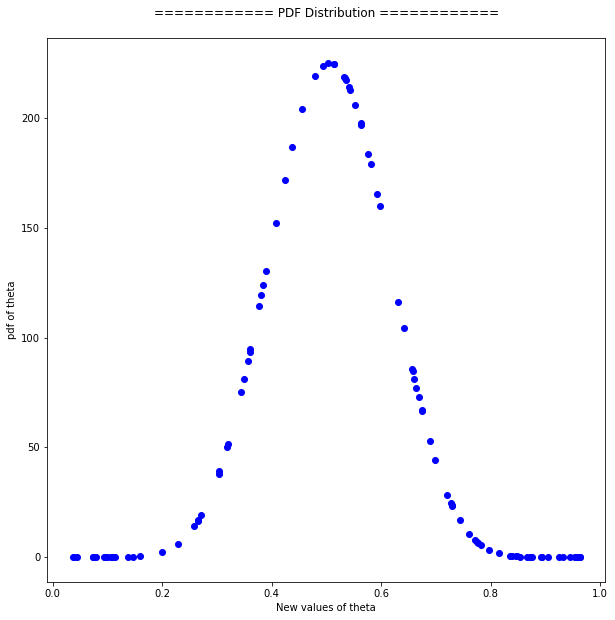

In [16]:
plt.figure(figsize = (10,10))  
plt.ylabel('pdf of theta')
plt.xlabel('New values of theta')
plt.title('============ PDF Distribution ============\n')
plt.scatter(theta_output, prob_dist_theta, c ="blue") 

print('\nPosteriori Distribution Mean:\n{}'.format(np.mean(prob_dist_theta)))
print('\nPosteriori Distribution Standard Deviation:\n{}'.format(np.std(prob_dist_theta)))

# For Normal Distribution

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt

def pdf(h,t,theta):
    return(np.math.factorial(t+1)/(np.math.factorial(h)*np.math.factorial(t-h))*(theta**h)*((1-theta)**h))
    
def update(theta,theta_n,s_belief):
    
    ind_prob = []
    for i in range(len(s_belief)):
        ind_prob.append(s_belief[i][0])
        ind_prob.append(s_belief[i][1]*theta+s_belief[i][1]*theta_n)
        ind_prob.append(1 - s_belief[i][1]*theta+s_belief[i][1]*theta_n)  
    return(ind_prob)
        

def compute(theta, s_belief):
    
    theta_n = 1-theta
    prob_list = []
    new_theta = []
    ind_prob = []
    h_count = 0
    v_count = 0

    for i in range(len(s_belief)):
        candidate_decision = s_belief[i][0]
        if candidate_decision == 'v':
            v_count+=1
            prob_v_given_theta = s_belief[i][1]
            prob_v_given_theta_n = s_belief[i][2]            
            prob_theta_given_v = prob_v_given_theta*theta
            prob_theta_n_given_v = prob_v_given_theta_n*theta_n
            prob_new_theta = prob_theta_given_v/(prob_theta_given_v+prob_theta_n_given_v)
            prob_new_theta_n = prob_theta_n_given_v/(prob_theta_given_v+prob_theta_n_given_v)
            new_theta.append(prob_new_theta)
            new_theta.append(prob_new_theta_n)
            ind_prob = update(prob_new_theta,prob_new_theta_n,s_belief[i:])   
            prob_h = prob_v_given_theta*theta + prob_v_given_theta_n*theta_n
            prob_list.append(prob_h)
            prob_list.append(1-prob_h)
            
            
        elif candidate_decision =='h':
            h_count+=1
            prob_h_given_theta = s_belief[i][1]
            prob_h_given_theta_n = s_belief[i][2]
            prob_theta_given_h = prob_h_given_theta*theta
            prob_theta_n_given_h = prob_h_given_theta_n*theta_n
            prob_new_theta = prob_theta_given_h/(prob_theta_given_h+prob_theta_n_given_h)
            prob_new_theta_n = prob_theta_n_given_h/(prob_theta_given_h+prob_theta_n_given_h)
            new_theta.append(prob_new_theta)
            new_theta.append(prob_new_theta_n)
            ind_prob = update(prob_new_theta,prob_new_theta_n,s_belief[i:])
            prob_h = prob_h_given_theta*theta + prob_h_given_theta_n*theta_n
            prob_list.append(prob_h)
            prob_list.append(1-prob_h)
            
    
    return(ind_prob,new_theta,h_count,v_count,np.array(prob_list).reshape((-1,2)))



theta = list(np.random.normal(0,1,100))

bel_ind = [] #beliefs individuals given theta (for both theta is true and false)
    
b_1 = ['v']*17
b_2 = ['h']*10
for i in range(10):
    b_1.append(b_2[i])

belief_f = b_1

belief_val_theta = []
belief_val_theta_n = []
for i in range(27):
    belief_val_theta.append(np.round(random.uniform(0.1, 1),4))
    belief_val_theta_n.append(np.round(random.uniform(0.1, 1),4))
s_belief = list((zip(belief_f,belief_val_theta,belief_val_theta_n)))
random.shuffle(s_belief)
theta = list(np.random.uniform(0,1,100))
print('Likelihood:\n{}'.format(s_belief))

expected_val_theta = []
prob_dist_theta = []
theta_output = []
for i in range(len(theta)):
    
    ind_prob,new_theta,h,v,updated_beliefs = compute(theta[i],s_belief)
    new_theta = np.array(new_theta).reshape((-1,2))[-1][0]
    theta_output.append(new_theta)
    expected_val_theta.append((h+1)/(h+v+2))
    prob_dist_theta.append(pdf(h,v+h,theta[i]))
    print('\n=======================For theta {}======================\n'.format(theta[i]))
    print('Updated Other students beliefs as a result of previous decisions:\n Format => belief P(H|theta) P(H|not theta)\n{}'.format(ind_prob))
    print('\nTheta {}:{}\n'.format(i,np.round(theta[i],4)))
    print('\npdf(theta):\n{}'.format(prob_dist_theta[-1]))
    print('\nExpected Theta:\n{}'.format(expected_val_theta[-1]))
    print('\nNew Theta:\n[{}]'.format(new_theta))
    print('\nOdds : {}\n'.format(new_theta/(1-new_theta)))
    print('\nUpdated Beliefs:\nProb of horizonal Allignment ||\tProb of Vertical Allignment\n\n{}'.format(updated_beliefs))   


Likelihood:
[('h', 0.7017, 0.2421), ('v', 0.7765, 0.2114), ('v', 0.9459, 0.2016), ('v', 0.614, 0.2073), ('h', 0.3181, 0.9474), ('v', 0.5227, 0.6222), ('h', 0.785, 0.8993), ('v', 0.9723, 0.2411), ('v', 0.8368, 0.8284), ('v', 0.3392, 0.2417), ('h', 0.2997, 0.7707), ('h', 0.7018, 0.4078), ('h', 0.8777, 0.6503), ('v', 0.4081, 0.2335), ('v', 0.6917, 0.7381), ('v', 0.8354, 0.2862), ('v', 0.1257, 0.4267), ('h', 0.9396, 0.9112), ('h', 0.6234, 0.8077), ('v', 0.9521, 0.6978), ('h', 0.3896, 0.93), ('v', 0.7848, 0.8154), ('v', 0.9663, 0.4744), ('h', 0.1084, 0.8299), ('v', 0.5555, 0.8159), ('v', 0.4516, 0.1978), ('v', 0.988, 0.8453)]

=======================For theta 0.5025716539948222======================

Updated Other students beliefs as a result of previous decisions:
 Format => belief P(H|theta) P(H|not theta)
['v', 0.988, 0.9180474953504223]

Theta 0:0.5026


pdf(theta):
225.21352745749002

Expected Theta:
0.3793103448275862

New Theta:
[0.5414739395999887]

Odds : 1.1809011228884458


Updat


Theta 66:0.8598


pdf(theta):
0.15330600343808845

Expected Theta:
0.3793103448275862

New Theta:
[0.8775430449528202]

Odds : 7.1661347827465045


Updated Beliefs:
Prob of horizonal Allignment ||	Prob of Vertical Allignment

[[0.63724998 0.36275002]
 [0.69725564 0.30274436]
 [0.8415263  0.1584737 ]
 [0.55696818 0.44303182]
 [0.40634717 0.59365283]
 [0.53665295 0.46334705]
 [0.80102837 0.19897163]
 [0.86976333 0.13023667]
 [0.83562206 0.16437794]
 [0.32552751 0.67447249]
 [0.36574865 0.63425135]
 [0.66057218 0.33942782]
 [0.84581154 0.15418846]
 [0.38361572 0.61638428]
 [0.6982067  0.3017933 ]
 [0.75838531 0.24161469]
 [0.16790944 0.83209056]
 [0.93561745 0.06438255]
 [0.64924451 0.35075549]
 [0.91643934 0.08356066]
 [0.46538066 0.53461934]
 [0.78909106 0.21090894]
 [0.89732053 0.10267947]
 [0.20957644 0.79042356]
 [0.59201607 0.40798393]
 [0.41600945 0.58399055]
 [0.96798908 0.03201092]]

=======================For theta 0.19949857434232376======================

Updated Other studen


Posteriori Distribution Mean:
58.579328742020664

Posteriori Distribution Standard Deviation:
76.70780571994506


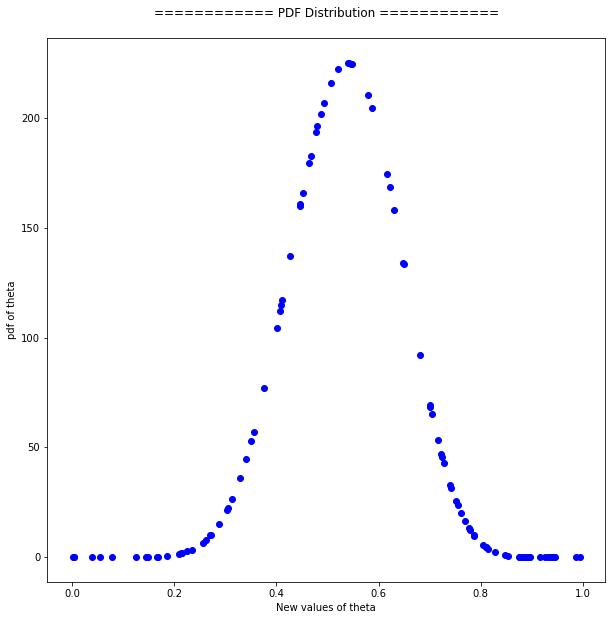

In [18]:
plt.figure(figsize = (10,10))  
plt.ylabel('pdf of theta')
plt.xlabel('New values of theta')
plt.title('============ PDF Distribution ============\n')
plt.scatter(theta_output, prob_dist_theta, c ="blue") 

print('\nPosteriori Distribution Mean:\n{}'.format(np.mean(prob_dist_theta)))
print('\nPosteriori Distribution Standard Deviation:\n{}'.format(np.std(prob_dist_theta)))